[[0.         1.         0.        ]
 [0.3        0.         0.7       ]
 [0.41       0.18       0.41      ]
 [0.341      0.246      0.413     ]
 [0.3485     0.2046     0.4469    ]
 [0.35453    0.2091     0.43637   ]
 [0.351821   0.212718   0.435461  ]
 [0.3519101  0.2110926  0.4369973 ]
 [0.35220845 0.21114606 0.43664549]
 [0.35210825 0.21132507 0.43656668]
 [0.35210251 0.21126495 0.43663254]
 [0.35211626 0.21126151 0.43662224]
 [0.35211282 0.21126975 0.43661742]
 [0.3521122  0.21126769 0.4366201 ]
 [0.3521128  0.21126732 0.43661988]
 [0.3521127  0.21126768 0.43661962]
 [0.35211266 0.21126762 0.43661973]
 [0.35211268 0.21126759 0.43661973]
 [0.35211268 0.21126761 0.43661971]
 [0.35211268 0.21126761 0.43661972]
 [0.35211268 0.21126761 0.43661972]
 [0.35211268 0.21126761 0.43661972]
 [0.35211268 0.21126761 0.43661972]
 [0.35211268 0.21126761 0.43661972]
 [0.35211268 0.21126761 0.43661972]
 [0.35211268 0.21126761 0.43661972]
 [0.35211268 0.21126761 0.43661972]
 [0.35211268 0.21126761 0.43

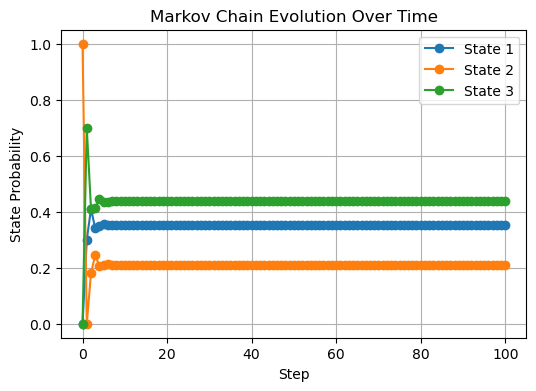

In [1]:
# Markov Chain
 
import numpy as np
import matplotlib.pyplot as plt

# Transition matrix
A = np.array( [ 
    [0.2, 0.6, 0.2],
    [0.3, 0, 0.7],
    [0.5, 0, 0.5]
])
# Initial state distribution 
pi = np.array([ 0, 1, 0])
steps = 100
inicial_state = [pi] 

for i in range(steps):
    pi = pi @ A
    inicial_state.append(pi)

inicial_state = np.array(inicial_state)
print (inicial_state)

plt.figure(figsize=(6, 4))
plt.plot(inicial_state[:, 0], label="State 1", marker='o')
plt.plot(inicial_state[:, 1], label="State 2", marker='o')
plt.plot(inicial_state[:, 2], label="State 3", marker='o')

plt.title("Markov Chain Evolution Over Time")
plt.xlabel("Step")
plt.ylabel("State Probability")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import numpy as np

# Transition matrix

A = np.array([
    [0.2, 0.6, 0.2],
    [0.3, 0.0, 0.7],
    [0.5, 0.0, 0.5]
])

eigvals, eigvecs = np.linalg.eig(A.T)

steady_state = eigvecs[:, np.isclose(eigvals, 1)]

steady_state = steady_state[:, 0] / steady_state[:, 0].sum()

print("Steady state distribution:")
print(steady_state)


Steady state distribution:
[0.35211268-0.j 0.21126761-0.j 0.43661972-0.j]


In [5]:
import numpy as np 

# Hot - 0
# Cold -1
# Warm  -2
#transition matrix
A = np.array(
    [
        [0.6, 0.1, 0.3],
        [0.1, 0.8, 0.1],
        [0.3, 0.1, 0.6]
    ]
)

#inicial state distribution
pi = np.array([0.1, 0.7, 0.2])

current_state = pi @ A
print(current_state)

[0.19 0.59 0.22]


In [6]:
# probability of  being  Hot -> Hot -> Hot
# since the prob for Hot -> Hot is 0.6 

hot_3 = A[0][0] * A[0][0] * A[0][0] 
#and now if it starts with Probability 0.1 
P_hot_3 = pi[0] * hot_3
print(P_hot_3)


0.0216


In [7]:
# Cold -> Hot -> Cold -> Hot
# Hot - 0
# Cold -1
# Warm  -2

sequence = A[1][0] * A[0][1]* A[1][0] 
P_seq  = pi[1] *sequence

print (sequence)
print (A[1][0])
print (A[0][1])
print (P_seq)

0.0010000000000000002
0.1
0.1
0.0007000000000000001


In [9]:
#Hidden Markov Model

# hidden states  Q = {Hot, Cold, Warm}
# indices  (hot = 0, cold - 1, warm - 2)

# Observations  V = {Jacket, Sweating, T_shirt}
#indices   (Jacket - 0, sweating = 1 , T_shirt = 2)

#Transition Probability Matrix 
#(A) This defines how likely you are to transition between weather states:
A = np.array(
    [
        [0.6, 0.1, 0.3],
        [0.1, 0.8, 0.1],
        [0.3, 0.1, 0.6]
    ]
)
# Let's say today is hot : there is a 60% chance it is hot tommorow, 10% - cold, and 30% - warm

#Emission Probability Matrix (B)

B = np.array([
    [0.1, 0.6, 0.3], 
    [0.7, 0.2, 0.1], 
    [0.2, 0.4, 0.4]
])
# Let's say today is hot : there is a 10% chance seing Jacket, 60% - sweating, and 30% - t-shirt

#Inicial state distribution (pi)

pi = np.array([0.1, 0.7, 0.2])

#it means there are 10% chance it's hot, 70% that is is cold and, 20% that is ti warm.




Task 1: 
What is the probability that you observe the sequence:

Jacket → Sweating → T-shirt
If you assume the hidden states are: COLD → HOT → WARM

Solution: 

1) P_start = 0.7
2) Cold -> Hot = 0.1 ; Hot -> Warm = 0.3




In [10]:

P = pi[1]
P *= A[1][0] * A[0][2]
P *=  B[1][0] * B[0][1] * B[2][2]

P

np.float64(0.003528)

To exemplify these models, we’ll use a task invented by Jason Eisner (2002).
Imagine that you are a climatologist in the year 2799 studying the history of global
warming. You cannot find any records of the weather in Baltimore, Maryland, for
the summer of 2020, but you do find Jason Eisner’s diary, which lists how many ice
creams Jason ate every day that summer. Our goal is to use these observations to
estimate the temperature every day. We’ll simplify this weather task by assuming
there are only two kinds of days: cold (C) and hot (H). So the Eisner task is as
follows:

In [11]:
# State hot(0)and cold (1) 


In [2]:
from hmmlearn import hmm
import numpy as np 


print("SHMM with Parameters")

model = hmm.CategoricalHMM(n_components=2, random_state= 425, init_params= "ste")


initial_distribution = np.array([0.1, 0.9])
model.startprob_=initial_distribution

print("Step 1.Complete - Define Inicial Distribution")

transition_distribution = np.array([
    [0.4, 0.6],
    [0.2, 0.8]
    ]) 

model.transmat_ = transition_distribution

print("Step 2. Complete - Defined Transition Matrix")

observation_probability_matrix = np.array(
    [
        [0.3, 0.5, 0.2], 
        [0.1, 0.5, 0.4]            
    ])

model.emissionprob_ = observation_probability_matrix

print("Step 3. compleste - Defined observation matrix") 

trials, simulated_states = model.sample(100000)

print("\nsamle of Simulated Trials - Based on Model Parameters")

print(trials[:10])


# Part Decoding the hidden state sequence that leads
# to an observation sequence of OK - Fail - Perfect

#split our data into sets 50/50 

X_train = trials[:trials.shape[0] //2]
X_test = trials[trials.shape[0] // 2:]

model.fit(X_train)

# the exam had 3 trials and dog had the following score:
# OK, Fail, Perfect (1, 0, 2)

exam_observations = [[1,0,2]]

predicted_states = model.predict(X = [[1, 0, 2]])
print("Predict the Hidden State Transitions that were being the exam scores OK, Fail, Perfect: \n 0 -> Tired , "
      "1 -> Happy")
print(predicted_states)

SHMM with Parameters
Step 1.Complete - Define Inicial Distribution
Step 2. Complete - Defined Transition Matrix
Step 3. compleste - Defined observation matrix


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'emissionprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'e'



samle of Simulated Trials - Based on Model Parameters
[[1]
 [1]
 [2]
 [1]
 [2]
 [0]
 [1]
 [1]
 [1]
 [2]]
Predict the Hidden State Transitions that were being the exam scores OK, Fail, Perfect: 
 0 -> Tired , 1 -> Happy
[1 0 0]


In [17]:
from hmmlearn import hmm
import numpy as np


model = hmm.CategoricalHMM(n_components = 2, random_state= 2002, n_features=3, init_params='') 

# hidden states - cold Hot - 0, 1 
transition_matrix = np.array([
    [0.5, 0.5],
    [0.4, 0.6]
])
# rows - cold, hot
# columns - 1, 2, 3, ice creams  - but states 0, 1, 2

emission_matrix = np.array([
    [0.5, 0.4, 0.1],
    [0.2, 0.4, 0.4]
])

inicial_state = np.array([0.2, 0.8])

model.startprob_= inicial_state
print("Incial state")
model.transmat_ = transition_matrix
print("transition matrix")
model.emissionprob_ = emission_matrix
print("emistin matrix")


trials, simulated_states = model.sample(100000)
print("sample of simulated trials ")
print(trials[:3])

#  train

X_train = trials[:trials.shape[0] //2]
X_test = trials[trials.shape[0] //2:]

model.fit(X_train)


obeservation = [[2 ,0, 2]]

predicted_states = model.predict(X = [[2, 0, 2]])

print(f"Prediction for hidden states for observation: {obeservation} ")
print(predicted_states)



Incial state
transition matrix
emistin matrix
sample of simulated trials 
[[1]
 [1]
 [0]]
Prediction for hidden states for observation: [[2, 0, 2]] 
[1 0 1]


### There are three fundamental problems regarding HMMs:


- **Problem 1 (Likelihood)** : given an $HMM$ $\lambda$ = $(A,B)$ and an observcation sequence $O$, determine the likelihood $P(O|\lambda)$

- **Problem 2 (Decoding)** : given an $HMM$ $\lambda$ = $(A,B)$ and an observcation sequence $O$, discover the best hidden state sequence

- **Problem 3 (Learning)** : given an observation sequence $O$ and the set of states in the $HMM$, learn the $HMM$ parameters $A$ and $B$.


In [6]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
import numpy as np
import pickle

import seaborn as sns
sns.set_theme(style='whitegrid')

from pyhhmm.gaussian import GaussianHMM
from pyhhmm.multinomial import MultinomialHMM
from pyhhmm.heterogeneous import HeterogeneousHMM
import pyhhmm.utils as hu

%load_ext autoreload
%autoreload 2

In [5]:
from pyhhmm.gaussian import GaussianHMM
from pyhhmm.multinomial import MultinomialHMM
from pyhhmm.heterogeneous import HeterogeneousHMM

print("pyhhmm imported successfully!")


pyhhmm imported successfully!


In [6]:
states = ['H', 'C']
observations  = [[1, 2, 3]]

my_hmm = MultinomialHMM(n_states=2, n_emissions=  1,  n_features=[3]) #Multinomial HMM object

my_hmm.pi = np.array([0.8, 0.2]) #inicial state
my_hmm.A = np.array([[0.6, 0.4], [0.5,0.5]]) #transition prob
my_hmm.B = np.array([[[0.2, 0.4, 0.4], 
                       [0.5, 0.4, 0.1]] ]) # emission matrix

hu.pretty_print_hmm(my_hmm, states = states, emissions = observations)


Priors
+------------+------------+
|     H      |     C      |
+------------+------------+
| P(H)=0.800 | P(C)=0.200 |
+------------+------------+
Transitions
+---+--------------+--------------+
| _ |      H       |      C       |
+---+--------------+--------------+
| H | P(H|H)=0.600 | P(C|H)=0.400 |
| C | P(H|C)=0.500 | P(C|C)=0.500 |
+---+--------------+--------------+
Emissions
+---+--------------+--------------+--------------+
| _ |      1       |      2       |      3       |
+---+--------------+--------------+--------------+
| H | P(1|H)=0.200 | P(2|H)=0.400 | P(3|H)=0.400 |
| C | P(1|C)=0.500 | P(2|C)=0.400 | P(3|C)=0.100 |
+---+--------------+--------------+--------------+


In [7]:
observation_sequence = np.array([[2],[0],[2]])
print('P(3 1 3) = {:.4f}'.format(np.exp(my_hmm.forward(observation_sequence))))

P(3 1 3) = 0.0286


In [8]:
logL, state_seq = my_hmm.decode([observation_sequence], algorithm='viterbi')
print('The Viterbi state sequence: {}. logL = {:.4f}'.format([states[si] for si in state_seq[0]], logL))

logL, state_seq = my_hmm.decode([observation_sequence], algorithm='map')
print('The MAP state sequence: {}. logL = {:.4f}'.format([states[si] for si in state_seq[0]], logL))

The Viterbi state sequence: ['H', 'C', 'H']. logL = -4.3583
The MAP state sequence: ['H', 'C', 'H']. logL = 2.3632


Initialisation 1
iter: 0, log_likelihood = -2623.783283299134, delta = nan
iter: 1, log_likelihood = -2563.3153323615193, delta = 60.46795093761466
iter: 2, log_likelihood = -2562.292764460143, delta = 1.0225679013760782
iter: 3, log_likelihood = -2562.0764817476884, delta = 0.216282712454813
iter: 4, log_likelihood = -2561.928837693269, delta = 0.1476440544192883
iter: 5, log_likelihood = -2561.813653845279, delta = 0.11518384799001069
iter: 6, log_likelihood = -2561.720540426843, delta = 0.09311341843613263
iter: 7, log_likelihood = -2561.6435990416035, delta = 0.07694138523947913
Converged -> iter: 7, log_likelihood = -2561.6435990416035


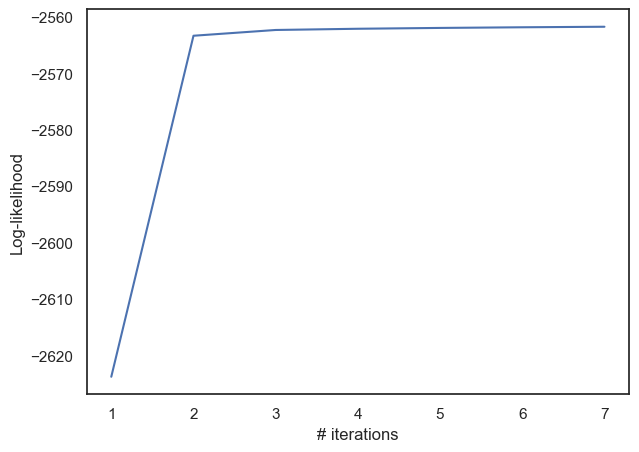

In [9]:
lengths = np.random.randint(25,150, size = 25)
X = [my_hmm.sample(n_sequences = 1, n_samples = n_samples)[0] for n_samples in lengths]
trained_hmm = MultinomialHMM(n_states = 2,
                             n_emissions = 1, 
                             n_features=[3], 
                             pi_prior = np.array([5,1]),
                             init_type = 'random') 
trained_hmm, log_likelihoods = trained_hmm.train(X, 
                                                 n_init = 1,
                                                 n_iter = 100, 
                                                 conv_thresh = 0.0001,
                                                 conv_iter = 5,
                                                 plot_log_likelihood = True)


In [11]:
my_hmm = GaussianHMM(
    n_states=4,
    n_emissions=2,
    covariance_type='diagonal'
)

my_hmm.pi = np.array([0.6, 0.3, 0.1, 0.0])
print(my_hmm.pi)

#transition matrix
my_hmm.A = np.array(
    [   [0.7, 0.2, 0.0, 0.1],
        [0.3, 0.5, 0.2, 0.0],
        [0.0, 0.3, 0.5, 0.2],
        [0.2, 0.0, 0.2, 0.6],])

my_hmm.means = np.array([[0.0, 0.0], [0.0, 11.0], [9.0, 10.0], [11.0, -1.0]])

my_hmm.covars = 0.5 * np.ones((4, 2))  # diagonal covariance matrix
hu.pretty_print_hmm(my_hmm, hmm_type='Gaussian')

[0.6 0.3 0.1 0. ]
Priors
+--------------+--------------+--------------+--------------+
|     S_0      |     S_1      |     S_2      |     S_3      |
+--------------+--------------+--------------+--------------+
| P(S_0)=0.600 | P(S_1)=0.300 | P(S_2)=0.100 | P(S_3)=0.000 |
+--------------+--------------+--------------+--------------+
Transitions
+-----+------------------+------------------+------------------+------------------+
|  _  |       S_0        |       S_1        |       S_2        |       S_3        |
+-----+------------------+------------------+------------------+------------------+
| S_0 | P(S_0|S_0)=0.700 | P(S_1|S_0)=0.200 | P(S_2|S_0)=0.000 | P(S_3|S_0)=0.100 |
| S_1 | P(S_0|S_1)=0.300 | P(S_1|S_1)=0.500 | P(S_2|S_1)=0.200 | P(S_3|S_1)=0.000 |
| S_2 | P(S_0|S_2)=0.000 | P(S_1|S_2)=0.300 | P(S_2|S_2)=0.500 | P(S_3|S_2)=0.200 |
| S_3 | P(S_0|S_3)=0.200 | P(S_1|S_3)=0.000 | P(S_2|S_3)=0.200 | P(S_3|S_3)=0.600 |
+-----+------------------+------------------+------------------+-

In [12]:
import numpy as np
lengths = np.random.randint(25,150, size = 25)
X = [my_hmm.sample(n_sequences=1, n_samples = n_samples)[0] for n_samples in lengths]

trained_hmm = GaussianHMM(n_states =4, 
                          n_emissions = 2, 
                          covariance_type='diagonal', 
                          verbose = False)

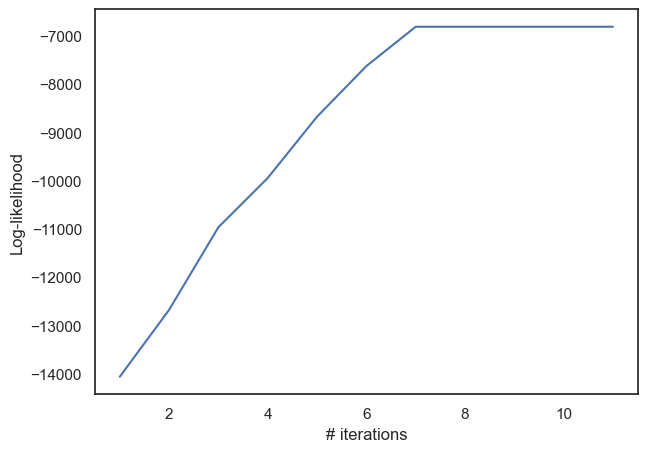

In [13]:
trained_hmm, log_likelihoods = trained_hmm.train(X, 
                                                 n_init = 1,
                                                 n_iter = 100,
                                                 conv_thresh = 0.0001,
                                                 conv_iter = 5,
                                                 plot_log_likelihood = True,
                                                 ignore_conv_crit = False,
                                                 no_init = False,)

In [14]:
hu.pretty_print_hmm(trained_hmm, hmm_type='Gaussian')

Priors
+--------------+--------------+--------------+--------------+
|     S_0      |     S_1      |     S_2      |     S_3      |
+--------------+--------------+--------------+--------------+
| P(S_0)=0.080 | P(S_1)=0.680 | P(S_2)=0.240 | P(S_3)=0.000 |
+--------------+--------------+--------------+--------------+
Transitions
+-----+------------------+------------------+------------------+------------------+
|  _  |       S_0        |       S_1        |       S_2        |       S_3        |
+-----+------------------+------------------+------------------+------------------+
| S_0 | P(S_0|S_0)=0.477 | P(S_1|S_0)=0.049 | P(S_2|S_0)=0.281 | P(S_3|S_0)=0.193 |
| S_1 | P(S_0|S_1)=0.027 | P(S_1|S_1)=0.672 | P(S_2|S_1)=0.190 | P(S_3|S_1)=0.110 |
| S_2 | P(S_0|S_2)=0.212 | P(S_1|S_2)=0.268 | P(S_2|S_2)=0.482 | P(S_3|S_2)=0.038 |
| S_3 | P(S_0|S_3)=0.217 | P(S_1|S_3)=0.194 | P(S_2|S_3)=0.053 | P(S_3|S_3)=0.537 |
+-----+------------------+------------------+------------------+------------------+